In [ ]:
import pandas as pd
import numpy as np
from pymgrid import Microgrid
from pymgrid.modules import (BatteryModule, LoadModule, RenewableModule, GridModule)


DEMAND_CHG_DATA_LOCATION = "ucsd-dataset/UCSD_Microgrid_Database/Data Files/DemandCharge.csv"
demand_charge_data = pd.read_csv(DEMAND_CHG_DATA_LOCATION, parse_dates=['DateTime'])
demand_charge_data.set_index('DateTime', inplace=True)
# Ensure data is old to new
demand_charge_data.sort_index(inplace=True, ascending=True)

# Per-module data
campus_generated_energy = demand_charge_data['OnCampusGeneration'].to_numpy()
# Generation can't be negative for the purposes of this model even though it is in a few places in the dataset
campus_generated_energy = campus_generated_energy.clip(min=0)
campus_load = demand_charge_data['TotalCampusLoad'].to_numpy()
# Avg cost of electricity in SD is 0.42 cents/kilowatt hr: https://www.energysage.com/local-data/electricity-cost/ca/san-diego-county/#:~:text=Electric%20rates%20in%20San%20Diego%20County%2C%20CA,-The%20easiest%20way&text=The%20average%20residential%20electricity%20rate,California%20of%2032.18%20¢%2FkWh.
# Avg amnt of co2 produced per kWh is 475 g: https://www.iea.org/reports/global-energy-co2-status-report-2019/emissions#:~:text=Today%20the%20average%20carbon%20intensity,of%20current%20power%20sector%20emissions.
# import price, export price, co2 per kWh
ts_grid = np.array([[0.42, 0, 475] for x in range(campus_load.size)])

battery1 = BatteryModule(min_capacity=10, max_capacity=5000, max_charge=2500, max_discharge=2500, efficiency=0.9, init_soc=0.5)
battery2 = BatteryModule(min_capacity=10, max_capacity=200000, max_charge=100000, max_discharge=100000, efficiency=0.9, init_soc=0.5)
renewable_energy = RenewableModule(time_series=campus_generated_energy)
load = LoadModule(time_series=campus_load)
grid = GridModule(max_import=50000, max_export=50000, time_series=ts_grid)

modules = [battery1, battery2, renewable_energy, load, grid]

ucsd_microgrid = Microgrid(modules, add_unbalanced_module=True)

print(ucsd_microgrid)

In [ ]:
DEMAND_CHG_DATA_LOCATION = "ucsd-dataset/UCSD_Microgrid_Database/Data Files/DemandCharge.csv"
demand_charge_data = pd.read_csv(DEMAND_CHG_DATA_LOCATION, parse_dates=['DateTime'])
demand_charge_data.set_index('DateTime', inplace=True)
# Ensure data is old to new
demand_charge_data.sort_index(inplace=True, ascending=True)

datetimes = demand_charge_data.index
ts_grid = []
# based on info from https://www.sdge.com/sites/default/files/regulatory/Summary%20Table%20for%20Web_Small%20Comm%201-1-18.pdf and https://www.sdge.com/total-electric-rates
for datetime in datetimes:
    hour = datetime.hour
    month = datetime.month
    # peak months are June-October
    if month > 5 and month < 11:
        peak = 0.45678
        off = 0.25124
        super_off = 0.19583
    # off peak months are November-May
    else:
        peak = 0.21401
        off = 0.20351
        super_off = 0.19157
    if hour >= 16 and hour < 21:
        # peak cost is between 4pm and 9pm
        cost_import = peak
    elif (hour >= 6 and hour < 16) or (hour>= 21 and hour < 24):
        # off peak is between 6am-4pm and 9pm-12am
        cost_import = off
    else:
        # super off peak is 12am-6am
        cost_import = super_off
    ts_grid.append([cost_import, 0, 475])
print(len(ts_grid))

ts_grid = np.array(ts_grid)

# Per-module data
campus_generated_energy = demand_charge_data['OnCampusGeneration'].to_numpy()
# Generation can't be negative for the purposes of this model even though it is in a few places in the dataset
campus_generated_energy = campus_generated_energy.clip(min=0)
campus_load = demand_charge_data['TotalCampusLoad'].to_numpy()

battery1 = BatteryModule(min_capacity=10, max_capacity=5000, max_charge=2500, max_discharge=2500, efficiency=0.9, init_soc=0.5)
battery2 = BatteryModule(min_capacity=10, max_capacity=200000, max_charge=100000, max_discharge=100000, efficiency=0.9, init_soc=0.5)
renewable_energy = RenewableModule(time_series=campus_generated_energy)
load = LoadModule(time_series=campus_load)
grid = GridModule(max_import=50000, max_export=50000, time_series=ts_grid)

modules = [battery1, battery2, renewable_energy, load, grid]

ucsd_microgrid_dynamic_pricing = Microgrid(modules, add_unbalanced_module=True)

print(ucsd_microgrid_dynamic_pricing)



In [ ]:
DEMAND_CHG_DATA_LOCATION = "ucsd-dataset/UCSD_Microgrid_Database/Data Files/DemandCharge.csv"
demand_charge_data = pd.read_csv(DEMAND_CHG_DATA_LOCATION, parse_dates=['DateTime'])
demand_charge_data.set_index('DateTime', inplace=True)
# Ensure data is old to new
demand_charge_data.sort_index(inplace=True, ascending=True)

datetimes = demand_charge_data.index
ts_grid = []
# based on info from https://www.sdge.com/sites/default/files/regulatory/Summary%20Table%20for%20Web_Small%20Comm%201-1-18.pdf and https://www.sdge.com/total-electric-rates
for datetime in datetimes:
    hour = datetime.hour
    month = datetime.month
    # peak months are June-October
    if month > 5 and month < 11:
        peak = 0.45678
        off = 0.25124
        super_off = 0.19583
    # off peak months are November-May
    else:
        peak = 0.21401
        off = 0.20351
        super_off = 0.19157
    if hour >= 16 and hour < 21:
        # peak cost is between 4pm and 9pm
        cost_import = peak
    elif (hour >= 6 and hour < 16) or (hour > 21 and hour < 24):
        # off peak is between 6am-4pm and 9pm-12am
        cost_import = off
    else:
        # super off peak is 12am-6am
        cost_import = super_off
    ts_grid.append([cost_import, 0, 475])
print(len(ts_grid))

ts_grid = np.array(ts_grid)

# Per-module data
campus_generated_energy = demand_charge_data['OnCampusGeneration'].to_numpy()
# Generation can't be negative for the purposes of this model even though it is in a few places in the dataset
campus_generated_energy = campus_generated_energy.clip(min=0)
campus_load = demand_charge_data['TotalCampusLoad'].to_numpy()
print(campus_load[0])
campus_load /= 2
print(campus_load[0])

battery1 = BatteryModule(min_capacity=10, max_capacity=5000, max_charge=2500, max_discharge=2500, efficiency=0.9, init_soc=0.5)
battery2 = BatteryModule(min_capacity=10, max_capacity=200000, max_charge=100000, max_discharge=100000, efficiency=0.9, init_soc=0.5)
renewable_energy = RenewableModule(time_series=campus_generated_energy)
load = LoadModule(time_series=campus_load)
grid = GridModule(max_import=50000, max_export=50000, time_series=ts_grid)

modules = [battery1, battery2, renewable_energy, load, grid]

ucsd_microgrid_dynamic_pricing_reduced_load = Microgrid(modules, add_unbalanced_module=True)

print(ucsd_microgrid_dynamic_pricing_reduced_load)

In [2]:

from pymgrid_simulator import PymgridNeuralNetworkMDP
import pandas as pd

def analyze_performance(grid_number=0, microgrid=None, end_step=None, num_episodes=1):
    learning_rate = 0.01
    discount_factor = 0.9
    num_episodes = num_episodes
    mdp = PymgridNeuralNetworkMDP(learning_rate, discount_factor, grid_num=grid_number, microgrid=microgrid, end_step=end_step)
    rewards = mdp.train(episodes=num_episodes, epsilon=0.2)
    total_reward, action_log, timestamps, microgrid_log = mdp.run_inference()
    print("Total Reward during Inference:", total_reward)
    random_reward, rand_actions, rand_timestamps, rand_mg_log = mdp.random_action_baseline()
    print("Total Reward for Random:", random_reward)

    # from example
    try:
        # Plot based on example from pymgrid:
        microgrid_log.loc[:, pd.IndexSlice[:, :, 'reward']].cumsum().plot(title='Cumulative Cost for NN MDP')
        rand_mg_log.loc[:, pd.IndexSlice[:, :, 'reward']].cumsum().plot(title='Cumulative Cost for Random Baseline')
        microgrid_log.loc[:, pd.IndexSlice[:, :, 'co2_production']].cumsum().plot(title='Cumulative CO2 for NN MDP')
        rand_mg_log.loc[:, pd.IndexSlice[:, :, 'co2_production']].cumsum().plot(title='Cumulative CO2 for Random Baseline')
    except:
        return microgrid_log, total_reward, random_reward
    try:
        microgrid_log[[('load', 0, 'load_current'),
                ('pv', 0, 'renewable_used'), ('battery', 0, 'discharge_amount'), ('battery', 1, 'discharge_amount')]].droplevel(axis=1, level=1).plot()
    except:
        return microgrid_log, total_reward, random_reward
    try:
        microgrid_log[[('battery', 0, 'current_charge'), ('battery', 1, 'current_charge')]].droplevel(axis=1, level=1).plot()
    except:
        return microgrid_log, total_reward, random_reward
    try: 
        microgrid_log[[
                ('unbalanced_energy', 0, 'loss_load')]].droplevel(axis=1, level=1).plot(title='Loss Load NN MDP')
        rand_mg_log[[
                ('unbalanced_energy', 0, 'loss_load')]].droplevel(axis=1, level=1).plot(title='Loss Load Random Baseline')
    except:
        return microgrid_log, total_reward, random_reward
    return microgrid_log, total_reward, random_reward


In [2]:
from pymgrid_simulator import PymgridParameterizedMDP
import pandas as pd

def analyze_performance_parameterized(grid_number=0, microgrid=None, end_step=None, num_episodes=1):
    learning_rate = 0.01
    discount_factor = 0.9
    num_episodes = num_episodes
    mdp = PymgridParameterizedMDP(learning_rate, discount_factor, grid_num=grid_number, microgrid=microgrid, end_step=end_step)
    rewards = mdp.train(episodes=num_episodes)
    total_reward, action_log, timestamps, microgrid_log = mdp.run_inference()
    print("Total Reward during Inference:", total_reward)
    random_reward, rand_actions, rand_timestamps, rand_mg_log = mdp.random_action_baseline()
    print("Total Reward for Random:", random_reward)
    # from example
    try:
        # Plot based on example from pymgrid:
        microgrid_log.loc[:, pd.IndexSlice[:, :, 'reward']].cumsum().plot(title='Cost for Parameterized MDP')
        rand_mg_log.loc[:, pd.IndexSlice[:, :, 'reward']].cumsum().plot(title='Cost for Random Baseline')
        microgrid_log.loc[:, pd.IndexSlice[:, :, 'co2_production']].cumsum().plot(title='CO2 for Parameterized MDP')
        rand_mg_log.loc[:, pd.IndexSlice[:, :, 'co2_production']].cumsum().plot(title='CO2 for Random Baseline')
    except:
        return microgrid_log, total_reward, random_reward
    try:
        microgrid_log[[('load', 0, 'load_current'),
                ('pv', 0, 'renewable_used'), ('battery', 0, 'discharge_amount'), ('battery', 1, 'discharge_amount')]].droplevel(axis=1, level=1).plot()
    except:
        return microgrid_log, total_reward, random_reward
    try:
        microgrid_log[[('battery', 0, 'current_charge'), ('battery', 1, 'current_charge')]].droplevel(axis=1, level=1).plot()
    except:
        return microgrid_log, total_reward, random_reward
    try:
        # Plot based on example from pymgrid
        microgrid_log[[('load', 0, 'load_met')]].droplevel(axis=1, level=1).plot()
    except:
        try: 
            microgrid_log[[
                    ('unbalanced_energy', 0, 'loss_load')]].droplevel(axis=1, level=1).plot()
        except:
            return microgrid_log, total_reward, random_reward
    return microgrid_log, total_reward, random_reward

In [7]:
param_microgrid_log = analyze_performance_parameterized(microgrid=ucsd_microgrid, end_step=75843)

NameError: name 'ucsd_microgrid' is not defined

/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.

  0%|          | 0/1 [00:00<?, ?it/s]

reward -74.26715757388244
step 1
action 0
reward -49.401328788303175
step 2
action 0
reward -49.40392573891553
step 3
action 0
reward -49.308785534216106
step 4
action 0
reward -49.81334821220042
step 5
action 0
reward -75.22334384357157
step 6
action 0
reward -129.23104776654571
step 7
action 0
reward -151.24102267671265
step 8
action 0
reward -179.9094244693659
step 9
action 0
reward -124.62940817406898
step 10
action 0
reward -142.51366756728132
step 11
action 0
reward -153.0353999819504
step 12
action 0
reward -290.13937390885053
step 13
action 0
reward -240.22026374187706
step 14
action 0
reward -225.1741509130688
step 15
action 0
reward -252.24291167840977
step 16
action 0
reward -363.7515711365985
step 17
action 0
reward -380.112517275982
step 18
action 0
reward -191.05282315911467
step 19
action 0
reward -160.0179905289323
step 20
action 0
reward -159.92710755678718
step 21
action 0
reward -123.13830682108826
step 22
action 0
reward -123.08730773534836
step 23
action 1
reward -

100%|██████████| 1/1 [00:14<00:00, 14.62s/it]

reward -76.37816770318383
step 8742
action 0
reward -130.79953113606476
step 8743
action 0
reward -152.43350939269814
step 8744
action 0
reward -168.2983347186144
step 8745
action 1
reward -104.69353495263157
step 8746
action 0
reward -106.88508078696799
step 8747
action 0
reward -153.64342445393171
step 8748
action 1
reward -290.1555058801127
step 8749
action 0
reward -234.035867355021
step 8750
action 0
reward -240.41004058517515
step 8751
action 0
reward -264.1862377631729
step 8752
action 0
reward -364.41839655265915
step 8753
action 0
reward -382.38801424902886
step 8754
action 0
reward -193.0888268407373
step 8755
action 1
reward -162.3219305572162
step 8756
action 0
reward -162.1074161135623
step 8757
action 0
reward -124.93056753715481
step 8758
action 0
Episode 1: Total Error = -227410.0498866135, Total Gradient Sum = -5026.286394883009
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19


/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



step 53
step 54
step 55
step 56
step 57
step 58
step 59
step 60
step 61
step 62
step 63
step 64
step 65
step 66
step 67
step 68
step 69
step 70
step 71
step 72
step 73
step 74
step 75
step 76
step 77
step 78
step 79
step 80
step 81
step 82
step 83
step 84
step 85
step 86
step 87
step 88
step 89
step 90
step 91
step 92
step 93
step 94
step 95
step 96
step 97
step 98
step 99
step 100
step 101
step 102
step 103
step 104
step 105
step 106
step 107
step 108
step 109
step 110
step 111
step 112
step 113
step 114
step 115
step 116
step 117
step 118
step 119
step 120
step 121
step 122
step 123
step 124
step 125
step 126
step 127
step 128
step 129
step 130
step 131
step 132
step 133
step 134
step 135
step 136
step 137
step 138
step 139
step 140
step 141
step 142
step 143
step 144
step 145
step 146
step 147
step 148
step 149
step 150
step 151
step 152
step 153
step 154
step 155
step 156
step 157
step 158
step 159
step 160
step 161
step 162
step 163
step 164
step 165
step 166
step 167
step 168
ste

/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



Total Reward for Random: -978247.1686632632


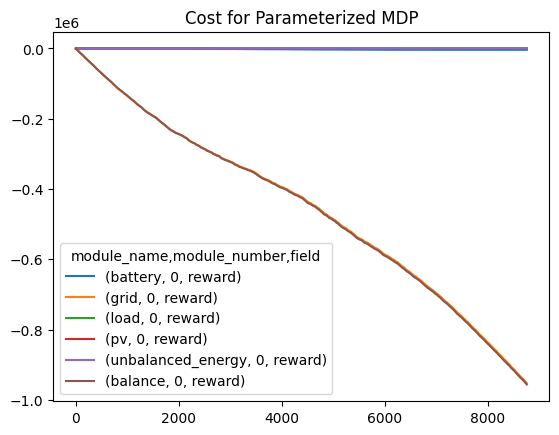

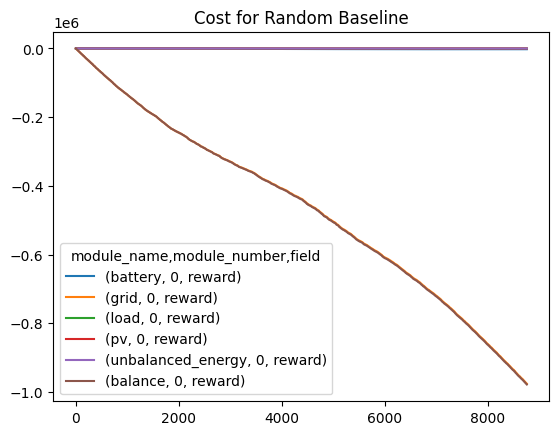

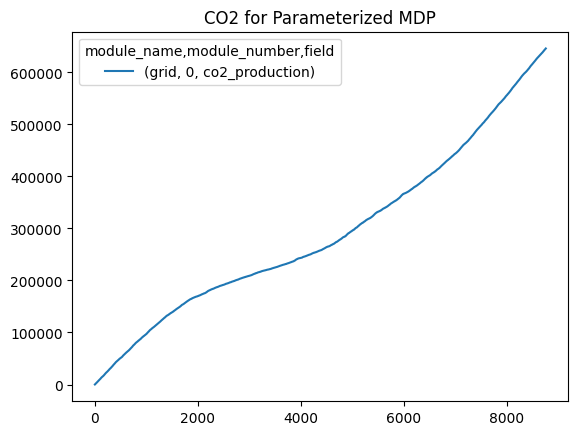

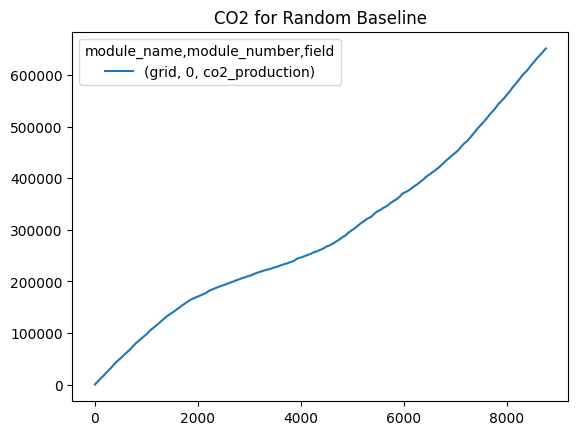

In [2]:
param_microgrid_log, total_reward, rand_reward = analyze_performance_parameterized(grid_number=0)

/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.

  0%|          | 0/2 [00:00<?, ?it/s]

reward -7355.732000314505
step 1
action 0
reward -1348.2320882343306
step 2
action 8
reward -1345.971874882818
step 3
action 0
reward -1338.6054880316053
step 4
action 0
reward -1352.2897514434317
step 5
action 0
reward -2611.8449755065003
step 6
action 0
reward -4502.634342923504
step 7
action 0
reward -5219.152667013144
step 8
action 0
reward -4655.883719052486
step 9
action 0
reward -3653.2960740819058
step 10
action 0
reward -4413.430426279467
step 11
action 0
reward -3969.0706734316836
step 12
action 0
reward -3662.100775028901
step 13
action 0
reward -3025.292079227833
step 14
action 2
reward -13915.770054374389
step 15
action 0
reward -2639.212774767453
step 16
action 0
reward -3734.8656267592014
step 17
action 0
reward -5023.401975575984
step 18
action 0
reward -4933.601731122791
step 19
action 0
reward -4118.006998675392
step 20
action 0
reward -4115.552477681587
step 21
action 0
reward -4119.416054738463
step 22
action 0
reward -4126.724086372454
step 23
action 0
reward -4307

 50%|█████     | 1/2 [00:51<00:51, 51.93s/it]

reward -2493.76793574748
step 8727
action 0
reward -2641.9959910949533
step 8728
action 0
reward -3946.663979047659
step 8729
action 0
reward -5445.767640203359
step 8730
action 0
reward -5368.836696105911
step 8731
action 0
reward -4417.309549962242
step 8732
action 0
reward -4388.962244842179
step 8733
action 0
reward -4397.506516179157
step 8734
action 0
reward -4401.474406435997
step 8735
action 0
reward -4511.622746790458
step 8736
action 0
reward -2072.4786157841695
step 8737
action 0
reward -1386.194591009054
step 8738
action 0
reward -1384.1256612426062
step 8739
action 6
reward -1378.6686350773596
step 8740
action 9
reward -6756.327076290181
step 8741
action 0
reward -2683.291890219931
step 8742
action 0
reward -4599.684932858025
step 8743
action 0
reward -5271.36687201454
step 8744
action 9
reward -6355.445920633854
step 8745
action 0
reward -2755.2032518628203
step 8746
action 8
reward -3084.5833446512015
step 8747
action 0
reward -2835.250553477535
step 8748
action 0
reward

100%|██████████| 2/2 [01:45<00:00, 52.68s/it]

reward -4417.309549962242
step 8732
action 0
reward -4388.962244842179
step 8733
action 0
reward -4397.506516179157
step 8734
action 2
reward -19709.109140964218
step 8735
action 4
reward -4511.622746790458
step 8736
action 0
reward -2072.4786157841695
step 8737
action 0
reward -1386.194591009054
step 8738
action 0
reward -1384.1256612426062
step 8739
action 0
reward -1378.6686350773596
step 8740
action 0
reward -1390.7270762901808
step 8741
action 7
reward -8048.891890219931
step 8742
action 0
reward -4599.684932858025
step 8743
action 0
reward -5271.36687201454
step 8744
action 0
reward -4343.345920633854
step 8745
action 0
reward -2755.2032518628203
step 8746
action 0
reward -3084.5833446512015
step 8747
action 0
reward -2835.250553477535
step 8748
action 0
reward -2651.2325977611627
step 8749
action 0
reward -1953.8055367435354
step 8750
action 0
reward -1870.4140504219904
step 8751
action 0
reward -2441.8798712499656
step 8752
action 0
reward -3753.3464476998347
step 8753
action 0


/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29
step 30
step 31
step 32
step 33
step 34
step 35
step 36
step 37
step 38
step 39
step 40
step 41
step 42
step 43
step 44
step 45
step 46
step 47
step 48
step 49
step 50
step 51
step 52
step 53
step 54
step 55
step 56
step 57
step 58
step 59
step 60
step 61
step 62
step 63
step 64
step 65
step 66
step 67
step 68
step 69
step 70
step 71
step 72
step 73
step 74
step 75
step 76
step 77
step 78
step 79
step 80
step 81
step 82
step 83
step 84
step 85
step 86
step 87
step 88
step 89
step 90
step 91
step 92
step 93
step 94
step 95
step 96
step 97
step 98
step 99
step 100
step 101
step 102
step 103
step 104
step 105
step 106
step 107
step 108
step 109
step 110
step 111
step 112
step 113
step 114
step 115
step 116
step 117
step 118
step 119
step 120
step 121
step 122
step 123
s

/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



Total Reward for Random: -138540681.472974


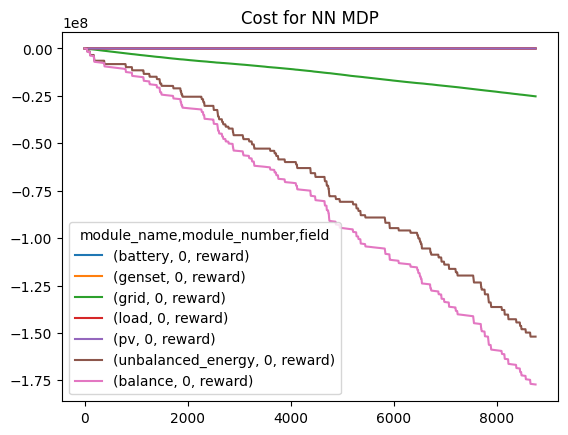

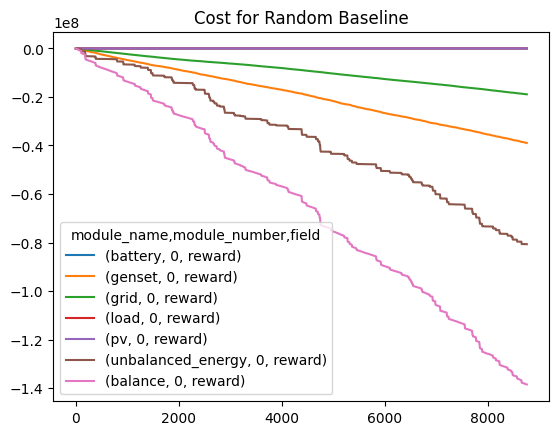

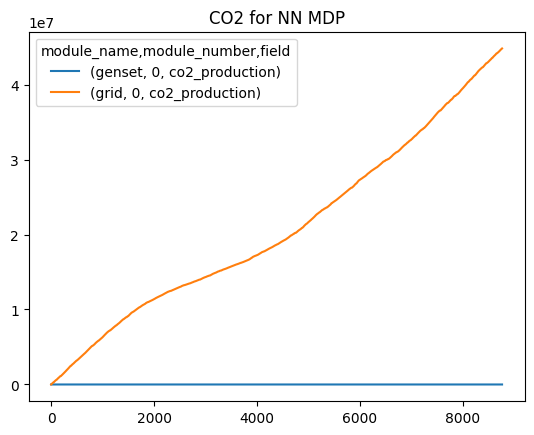

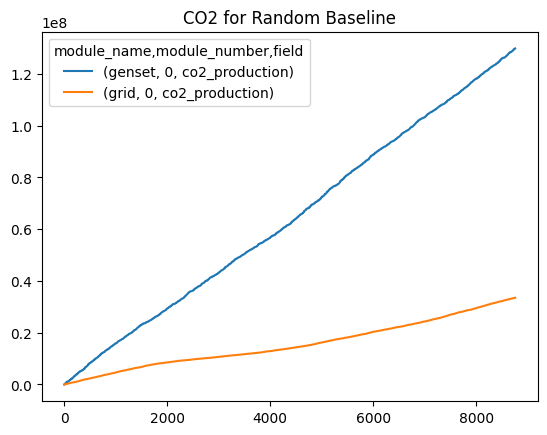

In [13]:
param_microgrid_log, total_reward, rand_reward = analyze_performance_parameterized(grid_number=1, num_episodes=2)

In [ ]:
param_microgrid_log[[('renewable', 0, 'renewable_used'), ('grid', 0, 'grid_import'), ('battery', 0, 'discharge_amount'), ('battery', 1, 'discharge_amount')]].droplevel(axis=1, level=1).plot()
param_microgrid_log[[('battery', 0, 'current_charge'), ('battery', 1, 'current_charge')]].droplevel(axis=1, level=1).plot()

In [ ]:
mg_log_reduced_load_dynamic_pricing = analyze_performance(microgrid=ucsd_microgrid_dynamic_pricing_reduced_load, end_step=75843)

In [ ]:

mg_log_reduced_load_dynamic_pricing[[('renewable', 0, 'renewable_used'), ('grid', 0, 'grid_import'), ('battery', 0, 'discharge_amount'), ('battery', 1, 'discharge_amount')]].droplevel(axis=1, level=1).plot()
mg_log_reduced_load_dynamic_pricing[[('battery', 0, 'current_charge'), ('battery', 1, 'current_charge')]].droplevel(axis=1, level=1).plot()
mg_log_reduced_load_dynamic_pricing[[('grid', 0, 'import_price_current')]].droplevel(axis=1, level=1).plot()
mg_log_reduced_load_dynamic_pricing.to_csv("dynamic_prcing_reduced_load.csv")

In [ ]:
microgrid_log = analyze_performance(microgrid=ucsd_microgrid, end_step=75843)

In [ ]:
dynamic_cost_microgrid_log = analyze_performance(microgrid=ucsd_microgrid_dynamic_pricing, end_step=75843)

In [ ]:
microgrid_log[[('renewable', 0, 'renewable_used'), ('grid', 0, 'grid_import'), ('battery', 0, 'discharge_amount'), ('battery', 1, 'discharge_amount')]].droplevel(axis=1, level=1).plot()
microgrid_log[[('battery', 0, 'current_charge'), ('battery', 1, 'current_charge')]].droplevel(axis=1, level=1).plot()
microgrid_log[[('grid', 0, 'import_price_current')]].droplevel(axis=1, level=1).plot()

In [ ]:
microgrid_log.to_csv("ucsd_pymgrid.csv")

NN MDP


/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.

  0%|          | 0/2 [00:00<?, ?it/s]

step 2
reward -49.401328788303175
action 0
step 3
reward -49.40392573891553
action 0
step 4
reward -49.308785534216106
action 0
step 5
reward -49.81334821220042
action 0
step 6
reward -75.22334384357157
action 0
step 7
reward -129.23104776654571
action 0
step 8
reward -151.24102267671265
action 0
step 9
reward -179.9094244693659
action 0
step 10
reward -124.62940817406898
action 0
step 11
reward -142.51366756728132
action 0
step 12
reward -153.0353999819504
action 0
step 13
reward -290.13937390885053
action 0
step 14
reward -240.22026374187706
action 0
step 15
reward -225.1741509130688
action 0
step 16
reward -252.24291167840977
action 0
step 17
reward -363.7515711365985
action 0
step 18
reward -380.112517275982
action 0
step 19
reward -191.05282315911467
action 0
step 20
reward -160.0179905289323
action 0
step 21
reward -159.92710755678718
action 0
step 22
reward -123.13830682108826
action 0
step 23
reward -123.08730773534836
action 0
step 24
reward -127.17290068151442
action 0
step 2

 50%|█████     | 1/2 [00:31<00:31, 31.19s/it]

step 8723
reward -151.5679509528223
action 0
step 8724
reward -148.03320652022788
action 0
step 8725
reward -278.74320107381925
action 0
step 8726
reward -223.16084637363832
action 0
step 8727
reward -247.8351266902822
action 0
step 8728
reward -270.99691608257257
action 0
step 8729
reward -367.45795286626725
action 0
step 8730
reward -386.7668588000182
action 0
step 8731
reward -197.96993980454621
action 0
step 8732
reward -164.7786357209383
action 0
step 8733
reward -164.28239224102802
action 0
step 8734
reward -127.56791005506834
action 0
step 8735
reward -127.46580917098652
action 0
step 8736
reward -130.42725981329937
action 0
step 8737
reward -75.63559890114404
action 0
step 8738
reward -50.03557957343823
action 0
step 8739
reward -50.047852745899405
action 0
step 8740
reward -49.98631805188022
action 0
step 8741
reward -50.46683772043991
action 0
step 8742
reward -76.37816770318383
action 0
step 8743
reward -130.79953113606476
action 0
step 8744
reward -152.43350939269814
action

100%|██████████| 2/2 [01:02<00:00, 31.33s/it]

step 8759
reward -124.89505215323517
action 0
Episode 2: Total Reward = -961300.7505688657



/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



Total Reward during Inference: -956059.6622849052


/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



Total Reward for Random: -979705.6614941689
random reward:  -979705.6614941689
total reward:  -956059.6622849052
cost difference:  -23645.99920926371


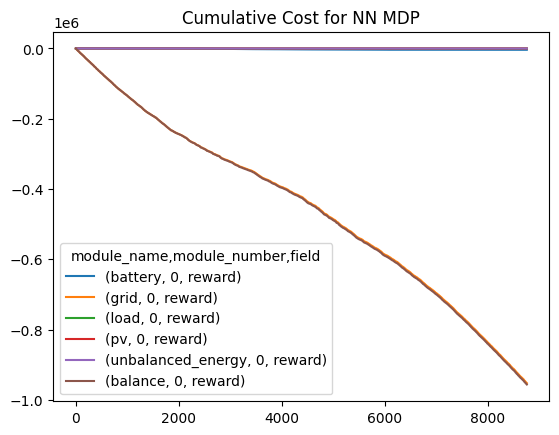

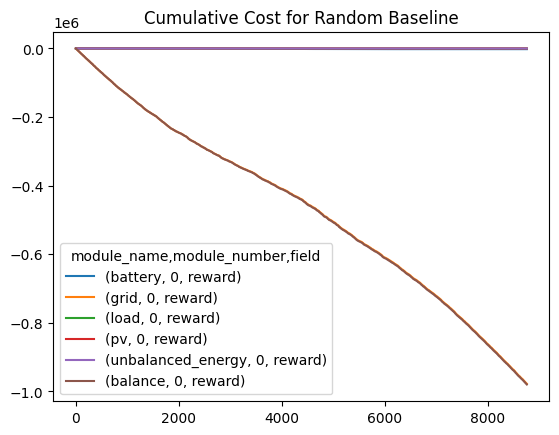

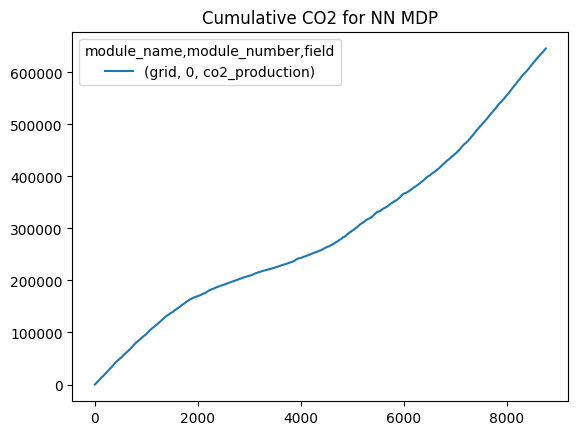

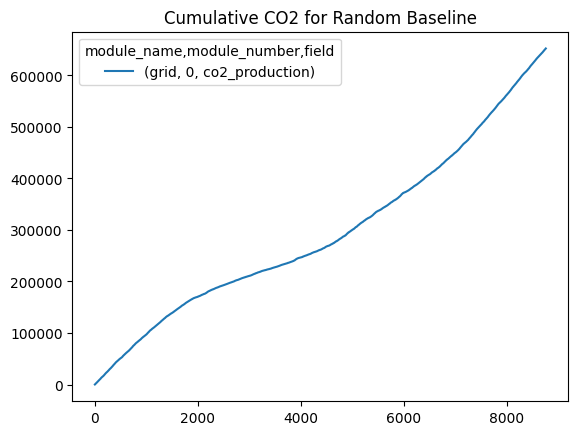

In [3]:
print("NN MDP")
grid_0_log, grid_0_reward, grid_0_rand_reward = analyze_performance(grid_number=0, num_episodes=2)
print("random reward: ", grid_0_rand_reward)
print("total reward: ", grid_0_reward)
print("cost difference: ", grid_0_rand_reward - grid_0_reward)

In [ ]:
print("Parameterized MDP")
grid_0_param_reward, grid_0_param_rand_reward = analyze_performance_parameterized(grid_number=0, num_episodes=2)
print("random reward: ", grid_0_param_rand_reward)
print("total reward: ", grid_0_param_reward)
print("cost difference: ", grid_0_param_rand_reward - grid_0_param_reward)

In [ ]:
grid_0_log.to_csv("pymgrid_grid_0_log.csv")

NN MDP


/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.

  0%|          | 0/2 [00:00<?, ?it/s]

step 2
reward -1348.2320882343306
action 0
step 3
reward -1345.971874882818
action 0
step 4
reward -1338.6054880316053
action 0
step 5
reward -1352.2897514434317
action 0
step 6
reward -2611.8449755065003
action 0
step 7
reward -4502.634342923504
action 0
step 8
reward -5219.152667013144
action 0
step 9
reward -4655.883719052486
action 0
step 10
reward -3653.2960740819058
action 0
step 11
reward -4413.430426279467
action 0
step 12
reward -3969.0706734316836
action 0
step 13
reward -3662.100775028901
action 0
step 14
reward -3025.292079227833
action 0
step 15
reward -2481.7823450288447
action 0
step 16
reward -2639.212774767453
action 0
step 17
reward -21625.44083583258
action 2
step 18
reward -5023.401975575984
action 0
step 19
reward -4933.601731122791
action 0
step 20
reward -4118.006998675392
action 0
step 21
reward -4115.552477681587
action 0
step 22
reward -4119.416054738463
action 0
step 23
reward -4126.724086372454
action 0
step 24
reward -4307.688812938408
action 0
step 25
rewa

 50%|█████     | 1/2 [00:57<00:57, 57.57s/it]

step 8750
reward -1953.8055367435354
action 0
step 8751
reward -1870.4140504219904
action 0
step 8752
reward -2441.8798712499656
action 0
step 8753
reward -21275.65456601659
action 5
step 8754
reward -5170.207359208173
action 0
step 8755
reward -5063.047856672378
action 0
step 8756
reward -4263.774360018622
action 0
step 8757
reward -4253.010436568921
action 0
step 8758
reward -4232.204323108513
action 0
step 8759
reward -4240.485243833036
action 0
Episode 1: Total Reward = -169714445.43381444
step 2
reward -1348.2320882343306
action 0
step 3
reward -1345.971874882818
action 0
step 4
reward -1338.6054880316053
action 0
step 5
reward -1352.2897514434317
action 0
step 6
reward -2611.8449755065003
action 0
step 7
reward -4502.634342923504
action 0
step 8
reward -5219.152667013144
action 0
step 9
reward -8352.757046155291
action 9
step 10
reward -3653.2960740819058
action 0
step 11
reward -4413.430426279467
action 0
step 12
reward -3969.0706734316836
action 0
step 13
reward -3662.100775028

100%|██████████| 2/2 [01:57<00:00, 58.82s/it]

step 8742
reward -2683.291890219931
action 0
step 8743
reward -4599.684932858025
action 0
step 8744
reward -5271.36687201454
action 0
step 8745
reward -6355.445920633854
action 9
step 8746
reward -2755.2032518628203
action 0
step 8747
reward -3084.5833446512015
action 0
step 8748
reward -2835.250553477535
action 0
step 8749
reward -2651.2325977611627
action 0
step 8750
reward -1953.8055367435354
action 0
step 8751
reward -1870.4140504219904
action 0
step 8752
reward -2441.8798712499656
action 0
step 8753
reward -21275.65456601659
action 3
step 8754
reward -5170.207359208173
action 0
step 8755
reward -5063.047856672378
action 0
step 8756
reward -19809.08093266446
action 5
step 8757
reward -4253.010436568921
action 0
step 8758
reward -4232.204323108513
action 0
step 8759
reward -4240.485243833036
action 0
Episode 2: Total Reward = -171083613.61192206



/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



Total Reward during Inference: -177205676.93145493


/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



Total Reward for Random: -137345451.66285506
random reward:  -137345451.66285506
total reward:  -177205676.93145493
cost difference:  39860225.26859987
Parameterized MDP


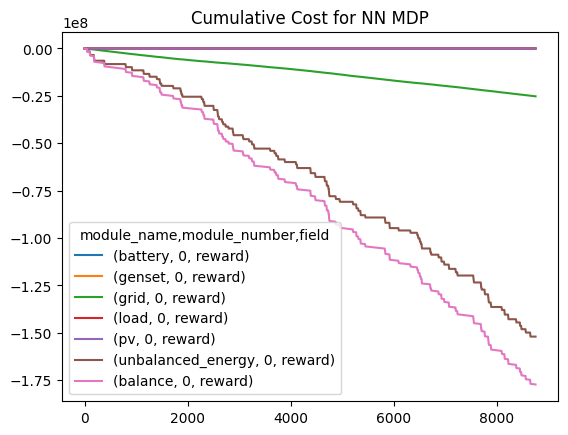

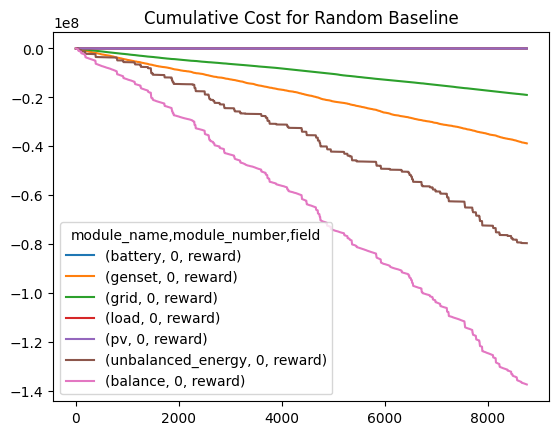

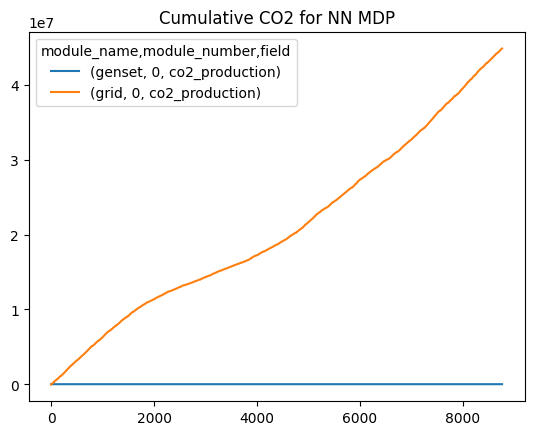

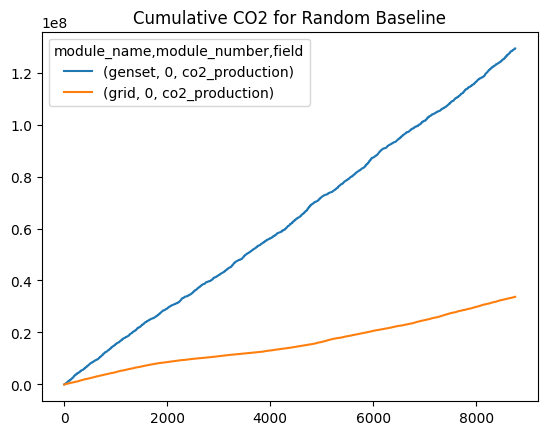

In [2]:
print("NN MDP")
grid_1_log, grid_1_reward, grid_1_rand_reward = analyze_performance(grid_number=1, num_episodes=2)
print("random reward: ", grid_1_rand_reward)
print("total reward: ", grid_1_reward)
print("cost difference: ", grid_1_rand_reward - grid_1_reward)
print("Parameterized MDP")
# grid_1_log, grid_1_param_reward, grid_1_param_rand_reward = analyze_performance_parameterized(grid_number=1, num_episodes=5)
# print("random reward: ", grid_1_param_rand_reward)
# print("total reward: ", grid_1_param_reward)
# print("cost difference: ", grid_1_param_rand_reward - grid_1_param_reward)

In [ ]:
grid_1_log.to_csv("pymgrid_grid_1_log.csv")

/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.

  0%|          | 0/2 [00:00<?, ?it/s]

step 2
reward -90961.4669495455
action 0
step 3
reward -5465.211623766895
action 1
step 4
reward -91158.47702308508
action 0
step 5
reward -92091.9639162707
action 0
step 6
reward -139477.49317280622
action 0
step 7
reward -238591.64121860664
action 0
step 8
reward -275840.0325675419
action 0
step 9
reward -11687.041687962897
action 3
step 10
reward -66607.0825249684
action 0
step 11
reward -54396.96343436881
action 0
step 12
reward -39367.025123328494
action 0
step 13
reward -34890.330393999175
action 0
step 14
reward -350.0469244935812
action 0
step 15
reward -30817.978802397338
action 0
step 16
reward -106846.8470990257
action 0
step 17
reward -271708.32216598
action 0
step 18
reward -284878.07910745894
action 0
step 19
reward -284895.4403940196
action 0
step 20
reward -239187.14800637402
action 2
step 21
reward -239055.95578698523
action 0
step 22
reward -238599.422337176
action 0
step 23
reward -237907.0086876709
action 0
step 24
reward -242907.10058459
action 0
step 25
reward -13

 50%|█████     | 1/2 [00:32<00:32, 32.50s/it]

step 8744
reward -16375.246690931863
action 3
step 8745
reward -200478.95050717687
action 0
step 8746
reward -151927.20654297763
action 0
step 8747
reward -130055.43454545634
action 0
step 8748
reward -62258.44056271573
action 0
step 8749
reward -92270.38438490679
action 0
step 8750
reward -64814.67675216844
action 0
step 8751
reward -85606.39419327729
action 0
step 8752
reward -148917.0881739567
action 0
step 8753
reward -258466.5679169177
action 0
step 8754
reward -284821.84403005766
action 0
step 8755
reward -284838.05311503087
action 0
step 8756
reward -239150.9323539125
action 0
step 8757
reward -239041.29760882794
action 0
step 8758
reward -238593.2141756417
action 0
step 8759
reward -237900.8464278602
action 0
Episode 1: Total Reward = -990897333.5612274
step 2
reward -90961.4669495455
action 0
step 3
reward -91086.86039611492
action 0
step 4
reward -91158.47702308508
action 0
step 5
reward -92091.9639162707
action 0
step 6
reward -139477.49317280622
action 0
step 7
reward -1431

100%|██████████| 2/2 [01:05<00:00, 32.57s/it]
/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



Total Reward during Inference: -1097710381.7354758


/Users/jazz/opt/anaconda3/lib/python3.9/site-packages/pymgrid/envs/base/base.py:147: PerformanceWarning:

indexing past lexsort depth may impact performance.



Total Reward for Random: -572226856.9547014
random reward:  -572226856.9547014
total reward:  -1097710381.7354758
cost difference:  525483524.78077435


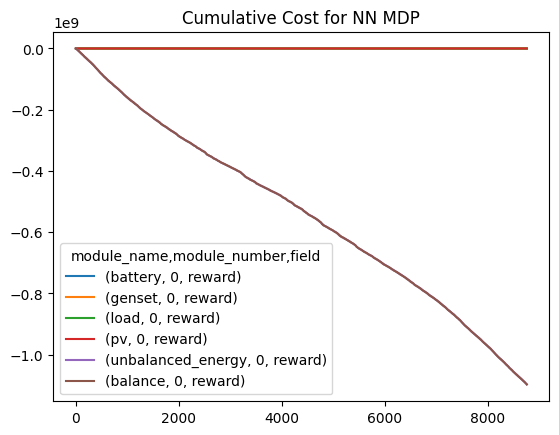

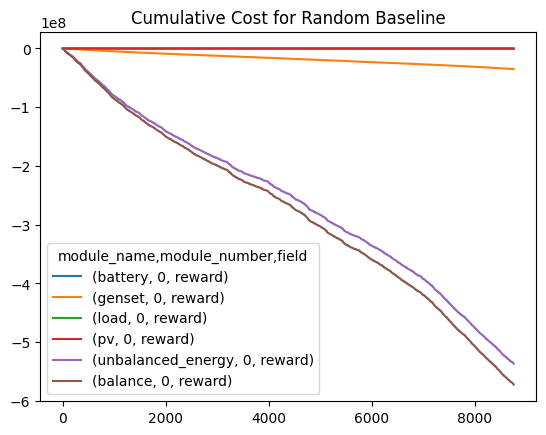

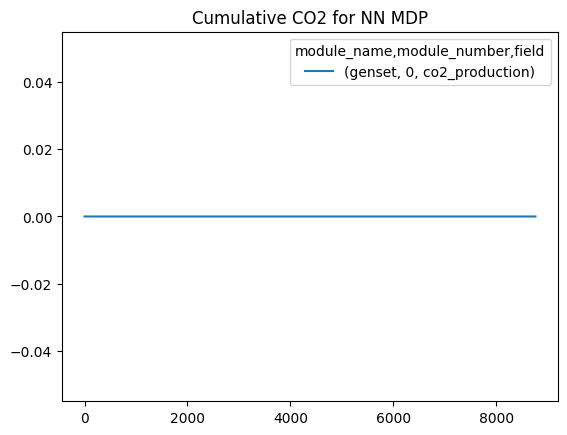

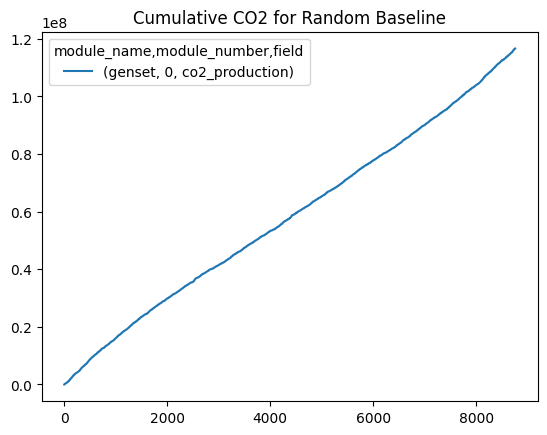

In [5]:
grid_2_log, grid_2_reward, grid_2_rand_reward = analyze_performance(grid_number=2, num_episodes=2)
print("random reward: ", grid_2_rand_reward)
print("total reward: ", grid_2_reward)
print("cost difference: ", grid_2_rand_reward - grid_2_reward)
grid_2_log.to_csv("pymgrid_grid_2_log.csv")

In [ ]:
grid_3_log, grid_3_reward, grid_3_rand_reward = analyze_performance(grid_number=3, num_episodes=10)
print("random reward: ", grid_3_rand_reward)
print("total reward: ", grid_3_reward)
print("cost difference: ", grid_3_rand_reward - grid_3_reward)
grid_3_log.to_csv("pymgrid_grid_3_log.csv")

In [ ]:
grid_4_log, grid_4_reward, grid_4_rand_reward = analyze_performance(grid_number=4, num_episodes=10)
print("random reward: ", grid_4_rand_reward)
print("total reward: ", grid_4_reward)
print("cost difference: ", grid_4_rand_reward - grid_4_reward)
grid_4_log.to_csv("pymgrid_grid_4_log.csv")

In [ ]:
grid_5_log, grid_5_reward, grid_5_rand_reward = analyze_performance(grid_number=5, num_episodes=10)
print("random reward: ", grid_5_rand_reward)
print("total reward: ", grid_5_reward)
print("cost difference: ", grid_5_rand_reward - grid_5_reward)
grid_5_log.to_csv("pymgrid_grid_5_log.csv")

In [ ]:
grid_6_log, grid_6_reward, grid_6_rand_reward = analyze_performance(grid_number=6, num_episodes=10)
print("random reward: ", grid_6_rand_reward)
print("total reward: ", grid_6_reward)
print("cost difference: ", grid_6_rand_reward - grid_6_reward)
grid_6_log.to_csv("pymgrid_grid_6_log.csv")

In [ ]:
grid_7_log, grid_7_reward, grid_7_rand_reward = analyze_performance(grid_number=7, num_episodes=10)
print("random reward: ", grid_7_rand_reward)
print("total reward: ", grid_7_reward)
print("cost difference: ", grid_7_rand_reward - grid_7_reward)
grid_7_log.to_csv("pymgrid_grid_7_log.csv")

In [ ]:
grid_8_log, grid_8_reward, grid_8_rand_reward = analyze_performance(grid_number=8, num_episodes=10)
print("random reward: ", grid_8_rand_reward)
print("total reward: ", grid_8_reward)
print("cost difference: ", grid_8_rand_reward - grid_8_reward)
grid_8_log.to_csv("pymgrid_grid_8_log.csv")

In [ ]:
grid_9_log, grid_9_reward, grid_9_rand_reward = analyze_performance(grid_number=9, num_episodes=10)
print("random reward: ", grid_9_rand_reward)
print("total reward: ", grid_9_reward)
print("cost difference: ", grid_9_rand_reward - grid_9_reward)
grid_9_log.to_csv("pymgrid_grid_9_log.csv")

In [ ]:
grid_10_log, grid_10_reward, grid_10_rand_reward = analyze_performance(grid_number=10, num_episodes=10)
print("random reward: ", grid_10_rand_reward)
print("total reward: ", grid_10_reward)
print("cost difference: ", grid_10_rand_reward - grid_10_reward)
grid_10_log.to_csv("pymgrid_grid_10_log.csv")

In [ ]:
grid_11_log, grid_11_reward, grid_11_rand_reward = analyze_performance(grid_number=11, num_episodes=10)
print("random reward: ", grid_11_rand_reward)
print("total reward: ", grid_11_reward)
print("cost difference: ", grid_11_rand_reward - grid_11_reward)
grid_11_log.to_csv("pymgrid_grid_11_log.csv")

In [ ]:
grid_12_log, grid_12_reward, grid_12_rand_reward = analyze_performance(grid_number=12, num_episodes=10)
print("random reward: ", grid_12_rand_reward)
print("total reward: ", grid_12_reward)
print("cost difference: ", grid_12_rand_reward - grid_12_reward)
grid_12_log.to_csv("pymgrid_grid_12_log.csv")

In [ ]:
grid_13_log, grid_13_reward, grid_13_rand_reward = analyze_performance(grid_number=13, num_episodes=10)
print("random reward: ", grid_13_rand_reward)
print("total reward: ", grid_13_reward)
print("cost difference: ", grid_13_rand_reward - grid_13_reward)
grid_13_log.to_csv("pymgrid_grid_13_log.csv")

In [ ]:
grid_14_log, grid_14_reward, grid_14_rand_reward = analyze_performance(grid_number=14, num_episodes=10)
print("random reward: ", grid_14_rand_reward)
print("total reward: ", grid_14_reward)
print("cost difference: ", grid_14_rand_reward - grid_14_reward)
grid_14_log.to_csv("pymgrid_grid_14_log.csv")